In [1]:
import pandas as pd
from training import *

## Best configuration (3/5):
- lr: 0.0005
- ts: 28000
- gamma: 0.99
- clip: 0.2
- n_steps: 128

In [2]:
# train for different reward weights
off_schedule_trip_weights = [-1.6, -2.0, -2.2, -2.4, -2.8]
for weight in off_schedule_trip_weights:
    train_flexsim(reward_weights={'off_schedule_trips': weight, 'lost_requests': -1.0},  save=True, test=True, 
                  n_steps=128, total_timesteps=28000, verbose=0, learning_rate=0.0005, gamma=0.99, clip_range=0.2)

Mean reward: -53.193 +/- 16.329
Agent saved in models/ppo_16.
------
Mean reward: -71.067 +/- 23.256
Agent saved in models/ppo_20.
------
Mean reward: -70.34 +/- 27.427
Agent saved in models/ppo_22.
------
Mean reward: -73.993 +/- 25.916
Agent saved in models/ppo_24.
------
Mean reward: -104.873 +/- 29.507
Agent saved in models/ppo_28.
------


## Conduct grid search

In [3]:
# Example usage:
results = grid_search_flexsim(
    lr_values=[0.0005, 0.0006],# learning rate
    ts_values=[24000, 28000],# timesteps
    gamma_values=[0.98, 0.99],# discount factor
    clip_values=[0.2],
    n_steps_values=[128, 256],
    verbose=0
)

Params: lr=0.0005, ts=24000, gamma=0.98, clip=0.2, n_steps=128
Reward: -75.433 +/- 22.69
------------------------
Params: lr=0.0005, ts=24000, gamma=0.98, clip=0.2, n_steps=256
Reward: -73.933 +/- 17.226
------------------------
Params: lr=0.0005, ts=24000, gamma=0.99, clip=0.2, n_steps=128
Reward: -66.833 +/- 15.488
------------------------
Params: lr=0.0005, ts=24000, gamma=0.99, clip=0.2, n_steps=256
Reward: -74.767 +/- 23.37
------------------------
Params: lr=0.0005, ts=28000, gamma=0.98, clip=0.2, n_steps=128
Reward: -72.933 +/- 20.617
------------------------
Params: lr=0.0005, ts=28000, gamma=0.98, clip=0.2, n_steps=256
Reward: -74.133 +/- 17.404
------------------------
Params: lr=0.0005, ts=28000, gamma=0.99, clip=0.2, n_steps=128
Reward: -65.5 +/- 22.648
------------------------
Params: lr=0.0005, ts=28000, gamma=0.99, clip=0.2, n_steps=256
Reward: -67.833 +/- 22.186
------------------------
Params: lr=0.0006, ts=24000, gamma=0.98, clip=0.2, n_steps=128
Reward: -67.967 +/- 2

In [4]:
df_results = pd.DataFrame(results)
df_results.to_csv('outputs/grid_search_results.csv', index=False)

In [ ]:
# df_results.to_csv('outputs/grid_search_results.csv', index=False)

# evaluate grid search

In [6]:
import matplotlib.pyplot as plt

In [7]:
df_results = pd.read_csv('outputs/grid_search_results.csv')
df_results['cv_reward'] = (df_results['std_reward'] / df_results['mean_reward']).round(2)*-1
df_results['mean_reward'] = df_results['mean_reward'].round(2)
df_results['std_reward'] = df_results['std_reward'].round(2)
df_results['lr'] = df_results['lr'].round(4)
df_results['clip'] = df_results['clip'].round(3)

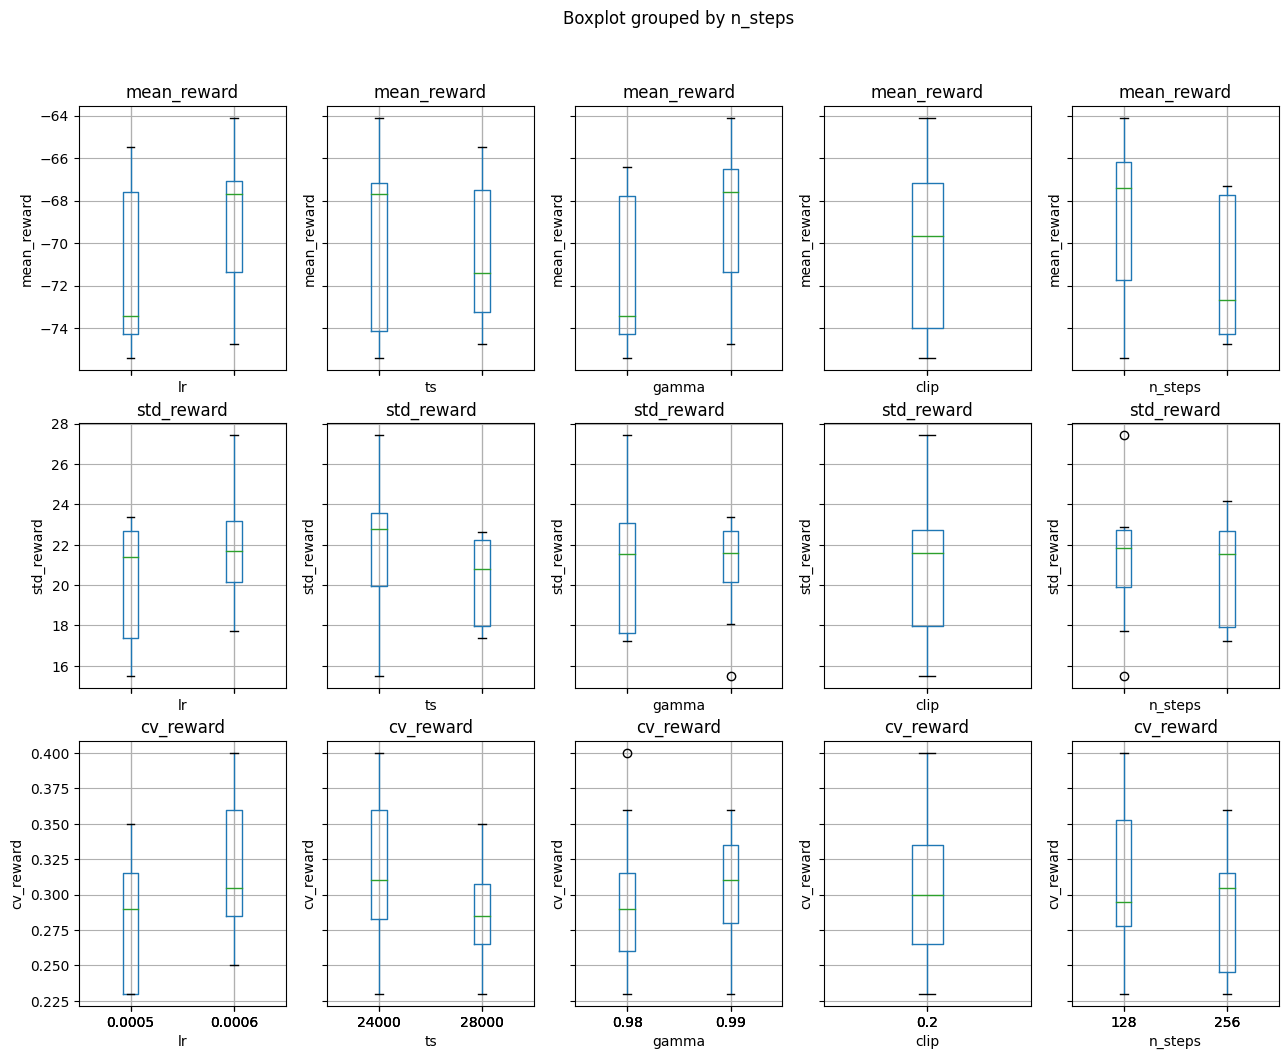

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 12), sharex='col', sharey='row')
params = ['lr', 'ts', 'gamma', 'clip', 'n_steps']
metrics = ['mean_reward', 'std_reward', 'cv_reward']
for i, param in enumerate(params):
    for j, metric in enumerate(metrics):
        ax = axs[j, i]
        # ax.set_title(f'{param} vs {metric}')
        ax.set_xlabel(param)
        ax.set_ylabel(metric)
        # make boxplot
        df_results.boxplot(column=metric, by=param, ax=ax)